In [24]:
import os
import numpy as np
import pandas as pd
import uproot as ur

import sys
sys.path.append('../..')
from jupyter_utils import *

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

# Lauren's colors
L_colors = ['red', 'darkorange', 'gold', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']

In [3]:
n_pt_bins = 4
pthatmins = np.array([20, 100, 500, 1000])
jet_pt_lo = np.array([20, 100, 500, 1000])
jet_pt_hi = np.array([30, 120, 550, 1100])

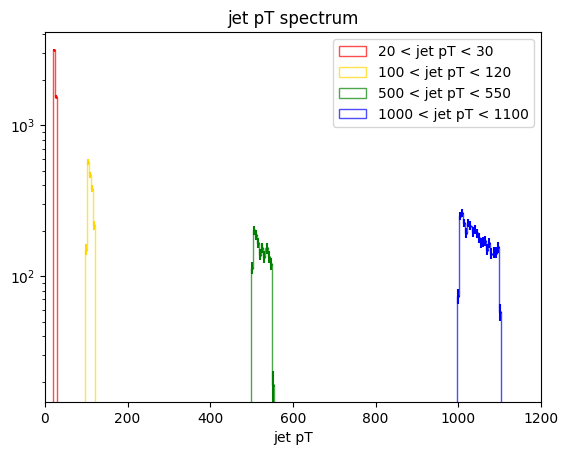

[4698.0, 1786.0, 1523.0, 3681.0]


ValueError: weights must have 2 or fewer dimensions

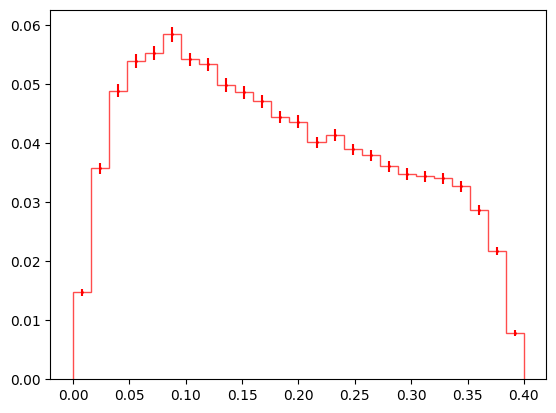

In [4]:
h_jetpt = []
h_jetshape = []
for pthatmin in pthatmins:
    f = ur.open("pt{}_R0p4.root".format(pthatmin))
    h_jetpt.append(f["h_jetpt"])
    h_jetshape.append(f["h_jetshape"])
    
integrals = []
for i in range(len(h_jetpt)):
    h = h_jetpt[i]
    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[2*i], label='{} < jet pT < {}'.format(jet_pt_lo[i], jet_pt_hi[i]))
    plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    integrals.append(np.sum(h.counts()))
    
plt.legend(loc='upper right')
plt.title("jet pT spectrum") 
plt.xlabel('jet pT')
plt.xlim(0, 1200)
plt.yscale('log')
plt.show()
print(integrals)


for i in range(n_pt_bins):
    h = h_jetshape[i]
    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), edgecolor=L_colors[2*i], lw=1, histtype = 'step', alpha=0.7, fill=False, label='{} < jet pT < {}'.format(jet_pt_lo[i], jet_pt_hi[i]))
    plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    
plt.legend(loc='upper right')
plt.title("R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.show()

h_R0p4 = h_jetshape


In [ ]:
h_jetpt = []
h_jetshape = []
for pthatmin in pthatmins:
    f = ur.open("pt{}_R0p2.root".format(pthatmin))
    h_jetpt.append(f["h_jetpt"])
    h_jetshape.append(f["h_jetshape"])
    
integrals = []
for i in range(len(h_jetpt)):
    h = h_jetpt[i]
    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[2*i], label='{} < jet pT < {}'.format(jet_pt_lo[i], jet_pt_hi[i]))
    plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    integrals.append(np.sum(h.counts()))
    
plt.legend(loc='upper right')
plt.title("jet pT spectrum") 
plt.xlabel('jet pT')
plt.xlim(0, 1200)
plt.yscale('log')
plt.show()
print(integrals)


for i in range(n_pt_bins):
    h = h_jetshape[i]
    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), edgecolor=L_colors[2*i], lw=1, histtype = 'step', alpha=0.7, fill=False, label='{} < jet pT < {}'.format(jet_pt_lo[i], jet_pt_hi[i]))
    plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    
plt.legend(loc='upper right')
plt.title("R=0.2") 
plt.xlabel('R')
plt.xlim(0, 0.2)
plt.show()

h_R0p2 = h_jetshape


In [5]:
# (R=0.2 - R=0.4) / R=0.2
# R scalled so that x-axis = delta R/jet R (percentage of jet R)

def get_rel_err(a, b):
    return np.sqrt( a.errors()**2 + (a.counts()**2 / b.counts()**2) * b.errors()**2) / b.counts()

for i in range(n_pt_bins):
    bin_edges = np.linspace(0,1,len(h_R0p2[i].axis("x").edges()))
    bin_width = bin_edges[1] - bin_edges[0]
    values = (h_R0p2[i].counts() - h_R0p4[i].counts()) / h_R0p4[i].counts()
    errors = get_rel_err(h_R0p2[i], h_R0p4[i])
    plt.hist(bin_edges[:-1], bin_edges, weights=values, edgecolor=L_colors[2*i], lw=1, histtype = 'step', alpha=0.7, fill=False, label='{} < jet pT < {}'.format(jet_pt_lo[i], jet_pt_hi[i]))
    plt.errorbar(bin_edges[:-1]+bin_width/2, values, yerr=errors, fmt='o', markersize=1, color=L_colors[2*i])
    
plt.axhline(0, linestyle='--', color='gray')
plt.legend(loc='lower left')
plt.title("(R=0.2 - R=0.4) / R=0.4") 
plt.xlabel('delta R / jet R')
plt.xlim(0, 1)
plt.show()

NameError: name 'h_R0p2' is not defined

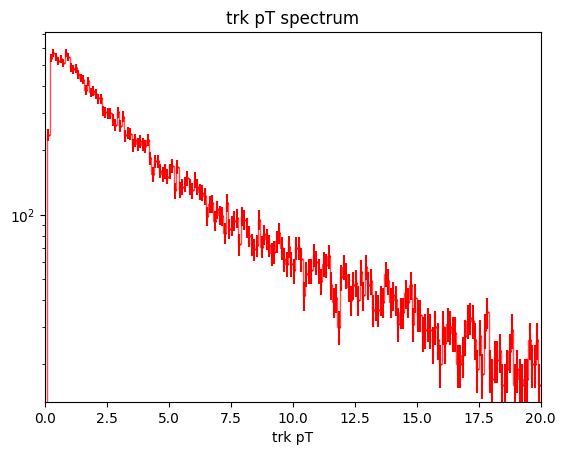

In [6]:
f = ur.open("pt100_R0p4.root")
h_jetpt = f["h_jetpt"]
h_jetshape = f["h_jetshape"]
h_trkpt = f["h_trkpt"]

h = h_trkpt
bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]
plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[0])
plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[0])

plt.title("trk pT spectrum") 
plt.xlabel('trk pT')
plt.xlim(0, 20)
plt.yscale('log')
plt.show()


In [7]:
# trk pt bins
trk_pt_lo = [0, 1, 2, 4, 7]
trk_pt_hi = [1, 2, 4, 7, 20]

def findbin(h_axis, value):
    edges = h_axis.edges()
    for i in range(len(edges)-1):
        if edges[i] <= value and value < edges[i+1]:
            return i
    return len(edges)-1

def yslice(th2d, bin_lo, bin_hi):
    h_slice = th2d.T[bin_lo:bin_hi]
    return np.sum(h_slice, axis=0)

def projectionXY(h):
    return np.sum(h, axis=2)

def xslice(th2d, bin_lo, bin_hi):
    h_slice = th2d[bin_lo:bin_hi]
    return np.sum(h_slice, axis=0)

def projectionX(h):
    if len(h.shape) == 3:
        return np.sum(projectionXY(h), axis=1)
    return np.sum(h, axis=1)

def projectionXZ(h):
    return np.sum(h, axis=1)


Njets : 1786.0
(0, 4)
(4, 8)
(8, 16)
(16, 28)
(28, 80)


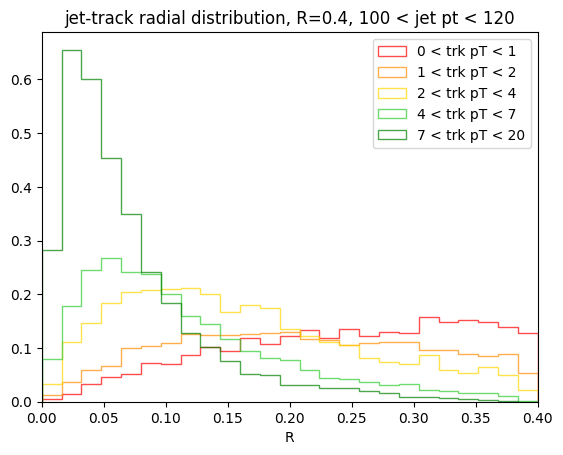

In [8]:
f = ur.open("pt100_R0p4.root")
h = f["h_jetshape"]
h_numpy = h.to_numpy()[0]
h_numpy = projectionXY(h_numpy)
N_jets = np.sum(f["h_jetpt"].to_numpy()[0])
print("Njets : " + str(N_jets))

integrals = []
h_trkpt_100 = []
for i in range(len(trk_pt_lo)):
    trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[i]), findbin(h.axis("y"), trk_pt_hi[i]))
    print(trk_pt_range)
    
    this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
    this_slice = this_slice / N_jets

    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(trk_pt_lo[i], trk_pt_hi[i]))
    h_trkpt_100.append(this_slice)
    
plt.legend(loc='upper right')
plt.title("jet-track radial distribution, R=0.4, 100 < jet pt < 120") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.show()


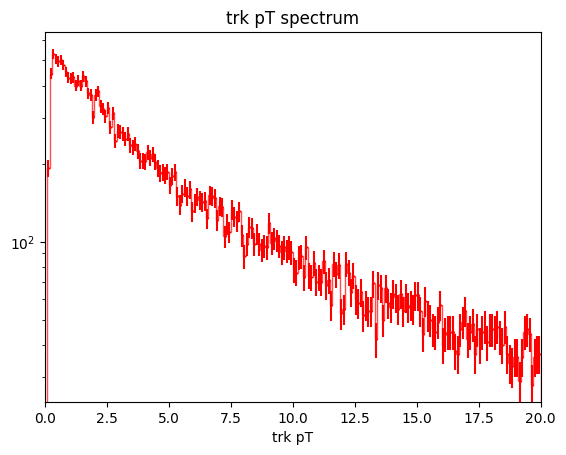

Njets : 1523.0
(0, 4)
2247.0
(4, 8)
3960.0
(8, 16)
5508.0
(16, 28)
4967.0
(28, 80)
8703.0


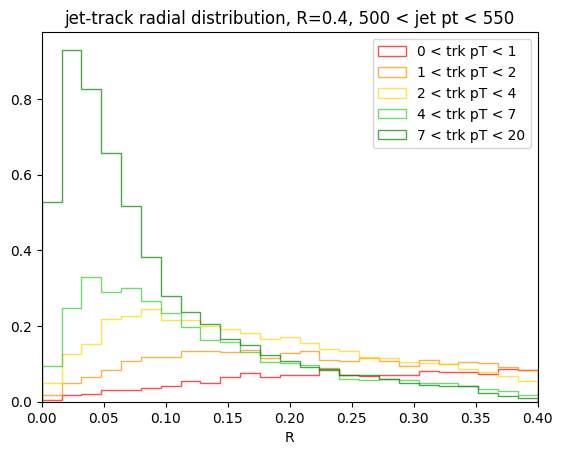

In [9]:
f = ur.open("pt500_R0p4.root")
h_trkpt = f["h_trkpt"]

h = h_trkpt
bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]
plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[0])
plt.errorbar(bin_edges[:-1]+bin_width/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[0])

plt.title("trk pT spectrum") 
plt.xlabel('trk pT')
plt.xlim(0, 20)
plt.yscale('log')
plt.show()

h = f["h_jetshape"]
h_numpy = h.to_numpy()[0]
h_numpy = projectionXY(h_numpy)
N_jets = np.sum(f["h_jetpt"].to_numpy()[0])
print("Njets : " + str(N_jets))

integrals = []
h_trkpt_500 = []
for i in range(len(trk_pt_lo)):
    trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[i]), findbin(h.axis("y"), trk_pt_hi[i]))
    print(trk_pt_range)
    
    this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
    print(np.sum(this_slice))
    this_slice = this_slice / N_jets

    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(trk_pt_lo[i], trk_pt_hi[i]))
    h_trkpt_500.append(this_slice)
    
plt.legend(loc='upper right')
plt.title("jet-track radial distribution, R=0.4, 500 < jet pt < 550") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.show()

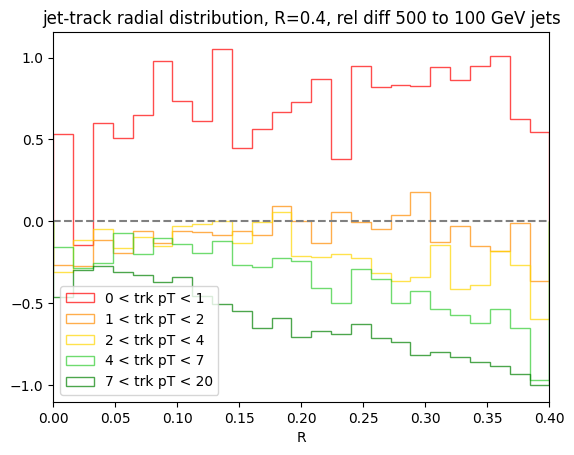

[]


In [10]:
for i in range(len(trk_pt_lo)):
    num = h_trkpt_100[i]
    denom = h_trkpt_500[i]
    this_slice = (num - denom) / denom

    bin_edges = h.axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(trk_pt_lo[i], trk_pt_hi[i]))
    #plt.errorbar(bin_edges[:-1]+bin_width/2, h1_d.values(), yerr=h1_d.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    #integrals.append(np.sum(h1_d.counts()))

plt.axhline(0, linestyle='--', color='gray')
plt.legend(loc='lower left')
plt.title("jet-track radial distribution, R=0.4, rel diff 500 to 100 GeV jets") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.show()
print(integrals)

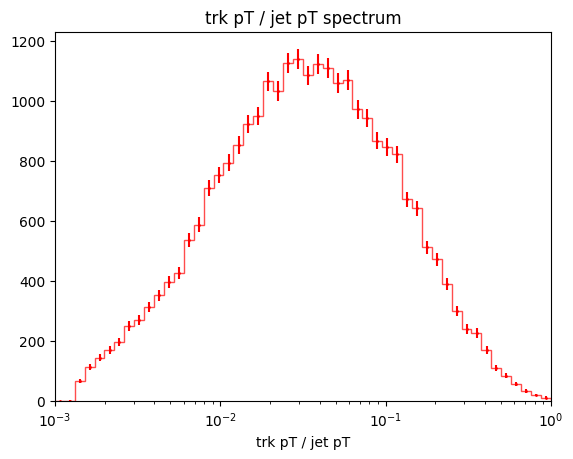

In [11]:
f = ur.open("pt100_R0p4.root")
h_trkpt = f["h_ptprofile"]

h = h_trkpt
bin_edges = h.axis("x").edges()
bin_widths = [bin_edges[i+1] - bin_edges[i] for i in range(len(bin_edges)-1)]
plt.hist(bin_edges[:-1], bin_edges, weights=h.values(), lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[0])
plt.errorbar(bin_edges[:-1]+np.array(bin_widths)/2, h.values(), yerr=h.errors(), fmt='o', markersize=1, color=L_colors[0])

plt.title("trk pT / jet pT spectrum") 
plt.xlabel('trk pT / jet pT')
plt.xscale("log")
plt.xlim(0.001, 1)
plt.show()

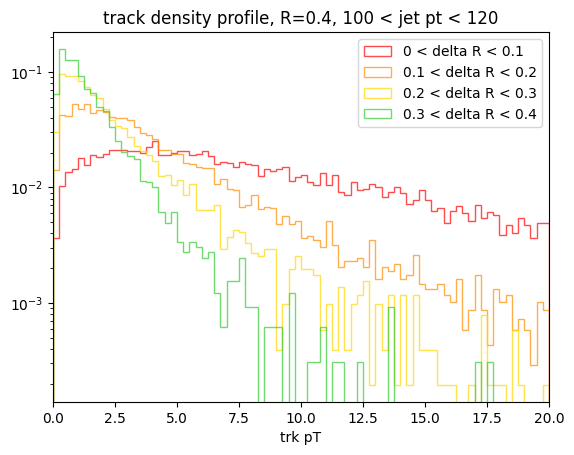

[9503.0, 6871.0, 5124.0, 3259.0]


In [12]:
r_bin_low = [0, 0.1, 0.2, 0.3]
r_bin_high = [0.1, 0.2, 0.3, 0.4]

f = ur.open("pt100_R0p4.root")
h = f["h_jetshape"].to_numpy()[0]
bin_edges = f["h_jetshape"].axis("y").edges()
bin_widths = [bin_edges[i+1] - bin_edges[i] for i in range(len(bin_edges)-1)]

integrals = []
for i in range(len(r_bin_low)):
    binlo = round(25 * r_bin_low[i] / 0.4)
    binhi = round(25 * r_bin_high[i] / 0.4)
    this_slice = xslice(projectionXY(h), binlo, binhi)
    
    integrals.append(np.sum(this_slice))
    this_slice = this_slice / np.sum(this_slice)

    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < delta R < {}'.format(r_bin_low[i], r_bin_high[i]))
    #plt.errorbar(bin_edges[:-1]+bin_width/2, h1_d.values(), yerr=h1_d.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    #integrals.append(np.sum(h1_d.counts()))
    
plt.legend(loc='upper right')
plt.title("track density profile, R=0.4, 100 < jet pt < 120") 
plt.xlabel('trk pT')
plt.xlim(0, 20)
plt.yscale("log")
plt.show()
print(integrals)


Njets : 1786.0


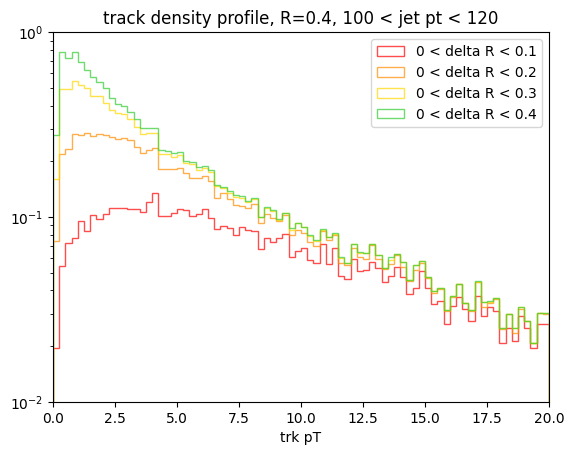

In [13]:
r_bin_low = [0, 0.1, 0.2, 0.3]
r_bin_high = [0.1, 0.2, 0.3, 0.4]

f = ur.open("pt100_R0p4.root")
h = f["h_jetshape"].to_numpy()[0]
N_jets = np.sum(f["h_jetpt"].to_numpy()[0])
print("Njets : " + str(N_jets))

bin_edges = f["h_jetshape"].axis("y").edges()
bin_widths = [bin_edges[i+1] - bin_edges[i] for i in range(len(bin_edges)-1)]

for i in range(len(r_bin_low)):
    binlo = 0
    binhi = round(25 * r_bin_high[i] / 0.4)
    this_slice = xslice(projectionXY(h), binlo, binhi)
    this_slice = this_slice / N_jets

    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < delta R < {}'.format(0, r_bin_high[i]))
    #plt.errorbar(bin_edges[:-1]+bin_width/2, h1_d.values(), yerr=h1_d.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    #integrals.append(np.sum(h1_d.counts()))
    
plt.legend(loc='upper right')
plt.title("track density profile, R=0.4, 100 < jet pt < 120") 
plt.xlabel('trk pT')
plt.xlim(0, 20)
plt.ylim(1e-2, 1)
plt.yscale("log")
plt.show()

In [14]:
fs = [ur.open("pt100_R0p4_temptemp2.root"), ur.open("pt500_R0p4_temptemp2.root")]
jet_pt_mask = [1, 2]
for i in range(len(fs)):
    f = fs[i]
    h = f["h_jetshape"].to_numpy()[0]
    
    n_r_bins = 25
    bin_edges = np.linspace(0, 0.4, 25)
    bin_widths = 0.4 / n_r_bins

    integrals = []

    h_to_graph = np.array([np.sum(xslice(projectionXZ(h), 0, i)) for i in range(n_r_bins-1)])
    print(h_to_graph)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[2*i], label='{} < jet pT < {}'.format(jet_pt_lo[jet_pt_mask[i]], jet_pt_hi[jet_pt_mask[i]]))
    #plt.errorbar(bin_edges[:-1]+bin_width/2, h1_d.values(), yerr=h1_d.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    #integrals.append(np.sum(h1_d.counts()))
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='lower right')
plt.title("track density profile, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)
plt.show()
print(integrals)

FileNotFoundError: file not found

    'pt100_R0p4_temptemp2.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


[     0.           7692.04110357  24995.13366915  41395.54820266
  54636.41771503  65297.49925504  73843.36953278  80833.89222897
  86380.3522632   91136.32051474  94920.52316592  98215.16208852
 101292.19366882 103757.18803423 105900.04477206 107773.72787772
 109577.93429404 111094.04333138 112452.83347005 113709.46190997
 114895.07269272 115875.66211919 116755.97688548 117614.93868686]
[     0.          11951.87930913  33441.37123378  52714.27852625
  68324.98779954  81440.59024969  91897.64548603 100058.95979881
 107084.83408093 113364.08773369 118721.32168152 123574.18836624
 127598.34213599 131433.22166885 134835.91865813 137882.61064886
 140496.2372148  142956.81558645 145262.01787844 147320.02793849
 149204.38219256 151053.8531975  152714.65088938 154051.46355246]


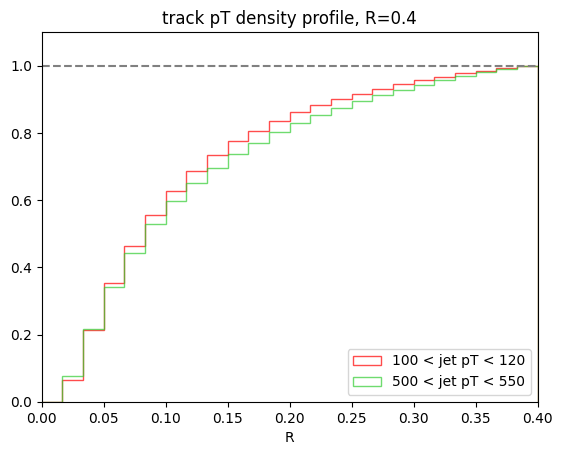

[]


In [15]:
fs = [ur.open("pt100_R0p4.root"), ur.open("pt500_R0p4.root")]
jet_pt_mask = [1, 2]
for i in range(len(fs)):
    f = fs[i]
    h = f["h_ptshape"].to_numpy()[0]

    n_r_bins = 25
    bin_edges = np.linspace(0, 0.4, 25)
    bin_widths = 0.4 / n_r_bins

    integrals = []

    h_to_graph = np.array([np.sum(xslice(projectionX(h), 0, i)) for i in range(n_r_bins-1)])
    print(h_to_graph)
    
    # normalization by inclusive RL selection
    h_to_graph = h_to_graph / h_to_graph[len(h_to_graph)-1]
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*i], label='{} < jet pT < {}'.format(jet_pt_lo[jet_pt_mask[i]], jet_pt_hi[jet_pt_mask[i]]))
    #plt.errorbar(bin_edges[:-1]+bin_width/2, h1_d.values(), yerr=h1_d.errors(), fmt='o', markersize=1, color=L_colors[2*i])
    #integrals.append(np.sum(h1_d.counts()))
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='lower right')
plt.title("track pT density profile, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)
plt.show()
print(integrals)

Njets : 1568.0
[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.  ]
(0, 4)
(4, 8)
(8, 16)
(16, 28)
(28, 80)


/tmp/ipykernel_1018130/1710249791.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


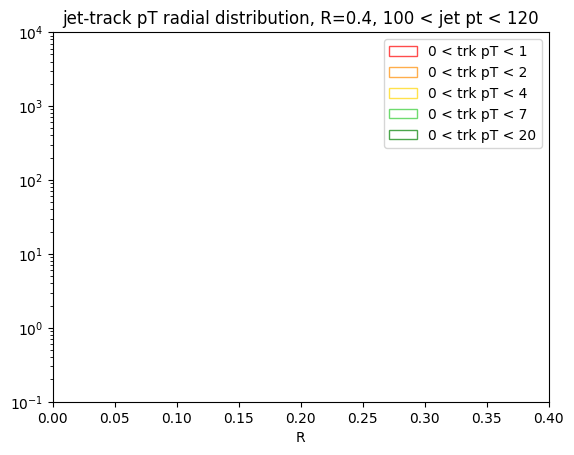

In [31]:
f = ur.open("pt100_R0p4.root")

jet_pt_lo = 100 
jet_pt_hi = 120

h = f["h_jetpt"]
h_jetpt = h.to_numpy()[0]
pt_range = (findbin(h.axis("x"), jet_pt_lo), findbin(h.axis("x"), jet_pt_hi))
h_jetpt = h_jetpt[pt_range[0]:pt_range[1]]
N_jets = np.sum(h_jetpt)
print("Njets : " + str(N_jets))

h = f["h_ptshape"]
bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]

h_numpy = h.to_numpy()[0]
print(h.axis("y").edges())
pt_range = (findbin(h.axis("z"), jet_pt_lo), findbin(h.axis("z"), jet_pt_hi))
h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])

for i in range(len(trk_pt_lo)):
    trk_pt_range = (findbin(h.axis("y"), trk_pt_lo[i]), findbin(h.axis("y"), trk_pt_hi[i]))
    print(trk_pt_range)
    
    this_slice = yslice(h_numpy, 0, trk_pt_range[1])
    this_slice = this_slice / (N_jets * bin_width)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[i], label='{} < trk pT < {}'.format(0, trk_pt_hi[i]))
    
plt.legend(loc='upper right')
plt.title("jet-track pT radial distribution, R=0.4, 100 < jet pt < 120") 
plt.xlabel('R')
plt.yscale("log")
plt.xlim(0, 0.4)
plt.ylim(1e-1, 1e4)
plt.show()